In [1]:
# EE104 HW3
using Plots
using LinearAlgebra
using Random
function ridgeregressionconstfeature(X,Y,lambda)
    n,d = size(X)
    m = size(Y,2)
    E = [zeros(d-1,1) I(d-1)]
    A = [X; sqrt(lambda*n)*E]
    B = [Y; zeros(d-1,m)]
    theta = A\B
end

ridgeregressionconstfeature (generic function with 1 method)

In [4]:
# Question 1

# Number of samples and dimension of samples
n = 10
R_x = 3

u = zeros(n, R_x)
Y = zeros(n, 1)

for i = 1: n
    u[i, rand(1:3)] = 1
    Y[i] = rand(1)[1] 
end

X = [ones(n,1) u]

Q, R = qr(X)

if Q*R == X
    println("Columns of X are linearly independent")
else
    println("Columns of X are not linearly independent")
end

Columns of X are not linearly independent


In [5]:
thetas = ridgeregressionconstfeature(X, Y, .04)
@show X
@show Y
@show sum(thetas[2:4])
# Note that because we are performing a floating point subtraction,
# a small amount of error is involved but the number below is so 
# small we can approximate it is 0

X = [1.0 0.0 1.0 0.0; 1.0 0.0 0.0 1.0; 1.0 1.0 0.0 0.0; 1.0 0.0 1.0 0.0; 1.0 0.0 1.0 0.0; 1.0 1.0 0.0 0.0; 1.0 0.0 1.0 0.0; 1.0 1.0 0.0 0.0; 1.0 1.0 0.0 0.0; 1.0 1.0 0.0 0.0]
Y = [0.927302125746317; 0.5540625246482997; 0.6486248507271986; 0.3270286219704699; 0.6284875621591723; 0.3255498719785064; 0.02158404080151488; 0.07780987740041634; 0.5518704317395116; 0.46223536354611205]
sum(thetas[2:4]) = -3.0531133177191805e-16


-3.0531133177191805e-16

In [38]:
# Question 3
using JSON

# Read in data from json file
include("readclassjson.jl")

data = readclassjson("temp.json")
T_train = data["T_train"]
T_test = data["T_test"]

730×1 Array{Float64,2}:
 14.3
 17.4
 18.5
 16.8
 11.5
  9.5
 12.2
 15.7
 16.3
 13.6
 12.6
 13.8
 12.1
  ⋮  
 15.4
 13.1
 13.2
 13.9
 10.0
 12.9
 14.6
 14.0
 13.6
 13.5
 15.7
 13.0

In [94]:
m1 = 0
m2 = 1
m3 = 20

Y = T_train[21:2920]
X1 = fill((sum(T_train[21:2920] / length(T_train[21:2920]))), length(T_train[21:2920]))

X2 = zeros(length(T_train) - 20, m2 + 1)
X2[:, 1] .= 1

X3 = zeros(length(T_train) - 20, m3 + 1)
X3[:, 1] .= 1

# Construct system of linear equations for training data
for i = 21:length(T_train)
    X2[i-20, 2] = T_train[i - 1]
    
    X3[i-20, 2:21] .= T_train[i - 20: i - 1 ]
end

In [106]:
t1 = sum(T_train[21:2920]) / length(T_train[21:2920])

lam = 10 .^ range(-2, stop=3, length=100)
t2s = zeros(length(lam), m2 + 1)
t3s = zeros(length(lam), m3 + 1)
# Evaluate ridge regression for different values of lambda
for i = 1:length(lam)
    t2 = ridgeregressionconstfeature(X2, Y, lam[i])
    t3 = ridgeregressionconstfeature(X3, Y, lam[i])
    
    t2s[i, :] = t2'
    t3s[i, :] = t3'
end



In [110]:
Y_test = T_test[21:730] 

X2_test = zeros(length(T_test) - 20, m2 + 1)
X2_test[:, 1] .= 1

X3_test = zeros(length(T_test) - 20, m3 + 1)
X3_test[:, 1] .= 1
# Construct system of linear equations for testing data
for i = 21:length(T_test)
    X2_test[i-20, 2] = T_test[i - 1]
    
    X3_test[i-20, 2:21] .= T_test[i - 20: i - 1 ]
end


# Evaluate errors for test data using ridge regression values at many values of lambda
rmserrs2 = zeros(length(lam))
rmserrs3 = zeros(length(lam))
for j = 1:length(lam)
    rmserrs2[j] = norm((X2_test * t2s[j, :]) - Y_test) / sqrt(length(Y_test))
    rmserrs3[j] = norm((X3_test * t3s[j, :]) - Y_test) / sqrt(length(Y_test))
end
rmserr1 = norm(fill(t1, length(Y_test)) - Y_test) / sqrt(length(Y_test))

rmsmin2 = rmserrs2[argmin(rmserrs2)] 
rmsmin3 = rmserrs3[argmin(rmserrs3)]
@show rmserr1
@show rmsmin2
@show rmsmin3

rmserr1 = 4.11559578715211
rmsmin2 = 2.376799610082278
rmsmin3 = 2.208053580719328


2.208053580719328

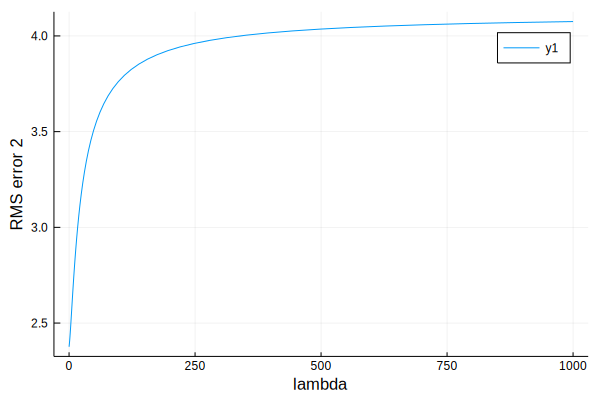

In [111]:
plot(lam, rmserrs2)
xlabel!("lambda")
ylabel!("RMS error 2")


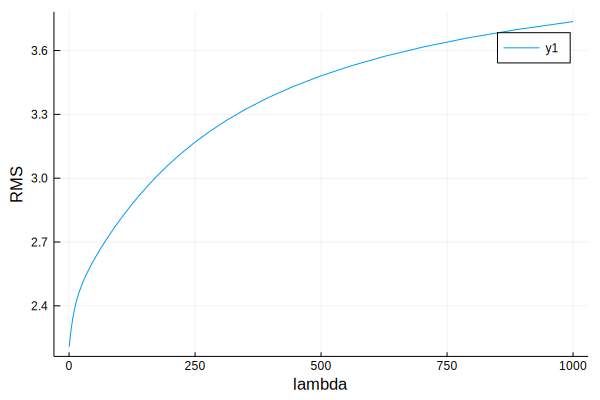

In [109]:
plot(lam, rmserrs3)
xlabel!("lambda")
ylabel!("RMS error 3")

In [99]:
# The best overall predictor is the 20 day linear regression model,
# which has a rms error of 2.21 degrees celsius